# Traditional Machine Learning

## Xgboost

XGBoost initially started as a research project by Tianqi Chen as part of the Distributed (Deep) Machine Learning Community (DMLC) group. Initially, it began as a terminal application which could be configured using a libsvm configuration file. It became well known in the ML competition circles after its use in the winning solution of the Higgs Machine Learning Challenge. Soon after, the Python and R packages were built, and XGBoost now has package implementations for Java, Scala, Julia, Perl, and other languages. This brought the library to more developers and contributed to its popularity among the Kaggle community, where it has been used for a large number of competitions.

It was soon integrated with a number of other packages making it easier to use in their respective communities. It has now been integrated with scikit-learn for Python users and with the caret package for R users. It can also be integrated into Data Flow frameworks like Apache Spark, Apache Hadoop, and Apache Flink using the abstracted Rabit and XGBoost4J. XGBoost is also available on OpenCL for FPGAs. An efficient, scalable implementation of XGBoost has been published by Tianqi Chen and Carlos Guestrin.

While the XGBoost model often achieves higher accuracy than a single decision tree, it sacrifices the intrinsic interpretability of decision trees.  For example, following the path that a decision tree takes to make its decision is trivial and self-explained, but following the paths of hundreds or thousands of trees is much harder. To achieve both performance and interpretability, some model compression techniques allow transforming an XGBoost into a single "born-again" decision tree that approximates the same decision function. 

### The algorithm

XGBoost works as Newton-Raphson in function space unlike gradient boosting that works as gradient descent in function space, a second order Taylor approximation is used in the loss function to make the connection to Newton Raphson method.

A generic unregularized XGBoost algorithm is:

Input: training set $\{(x_{i},y_{i})\}_{i=1}^{N}$, a differentiable loss function $L(y, F(x))$, a number of weak learners M and a learning rate $\alpha$.

Algorithm:

1. Initialize model with a constant value:
    $$
    \hat{f}_0(x) = arg_{\theta}\quad min \sum_{i=1}^N L(y_i,\theta)
    $$

2. For m = 1 to M:

    2.1 Compute the 'gradients' and 'hessians':
        $$
        \begin{aligned}
        \hat{g}_m(x_i) &= \left[\frac{\partial L(y_i,f(x_i))}{\partial f(x_i)} \right]_{f(x)=\hat{f}_{m-1}(x)}\\
        \hat{h}_m(x_i) &= \left[\frac{\partial^2 L(y_i,f(x_i))}{\partial^2 f(x_i)} \right]_{f(x)=\hat{f}_{m-1}(x)}\\
        \end{aligned}
        $$
    
    2.2 Fit a base learner (or weak learner, e.g. tree) using the training set $\{ x_i, -\frac{\hat{g}_m(x_i)}{\hat{h}_m(x_i)} \}_{i=1}^N$ , by solving the optimization problem below:
        $$
        \begin{aligned}
        \hat{\phi}_m &= arg_{\theta}\quad min \sum_{i=1}^N \frac{1}{2}\hat{h}_m(x_i) \left[ \phi(x_i) -\frac{\hat{g}_m(x_i)}{\hat{h}_m(x_i)} \right]^2 \\
        \hat{f}_m(x) &= \alpha \hat{\phi}_m(x)
        \end{aligned}
        $$
        
    2.3 Update the model:
        $$
        \hat{f}_{(m)}(x) = \hat{f}_{(m-1)}(x) + \hat{f}_m(x) 
        $$
    
3. Output: 
    $$
    \hat{f}(x) = \hat{f}_{(M)}(x) = \sum_{m=0}^M \hat{f}_{m}(x)
    $$


### Build Model

To build the model with mlita package.

In [4]:
from mlita.ml import MachineLearning
import numpy as np

model = MachineLearning.from_csv('./data/nmr_O.csv')
print(model.data.shape)
print(model.x_data.shape)
print(model.y_data.shape)
print(model.x_data)
print(model.y_data)

(209, 13)
(209, 12)
(209,)
     Shannon    Fisher   Fisher'      GBP       E2         E3      R2      R3  \
0     4.1289  452.5159  450.9670  59.3802  81.2625  7013.3132  8.7765  9.3762   
1     3.9963  452.4128  451.4264  59.3126  81.2630  7014.0417  8.5786  9.0430   
2     4.0957  452.0528  451.0737  59.6229  81.2512  7009.9724  8.6162  9.0794   
3     4.1077  452.0645  451.0799  59.6391  81.2512  7009.9788  8.6239  9.0913   
4     4.1020  452.0678  451.0834  59.6333  81.2523  7010.2438  8.6239  9.0929   
..       ...       ...       ...      ...      ...        ...     ...     ...   
204   4.0993  451.5210  450.7063  59.8561  81.2219  7002.2724  8.5843  9.0221   
205   4.2991  451.4576  451.2532  60.3065  81.2227  7003.4835  8.5145  8.9000   
206   4.3174  451.1989  451.2217  60.4655  81.2145  7000.1088  8.5288  8.9217   
207   4.1059  451.5319  450.7364  59.8653  81.2226  7002.4481  8.5867  9.0267   
208   4.3246  451.2035  451.2143  60.4792  81.2152  7000.3076  8.5296  8.9223   



In [6]:
# 超参调整
params={'max_depth':8,
    'n_estimators':29,
    'min_child_weight':8,
    'subsample':0.9,
    'colsample_bytree':0.6,
    'reg_alpha':0.1,
    'reg_lambda':0.7
    }
model_xgboost = model.xgboost(params=params)
x_test = np.random.rand(1,12)
model_xgboost.predict(x_test)

array([33.09164], dtype=float32)

### Save Data

In [3]:
model.to_csv()

In [4]:
scores = model.make_score()
scores

{'mse': 8.575921681875219,
 'mae': 1.7102975633621214,
 'r2': 0.9003680781166987,
 'r': 0.9543486060650683}

### Plot

True

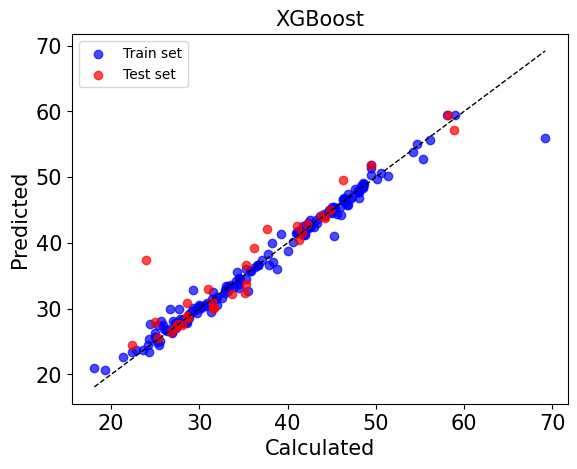

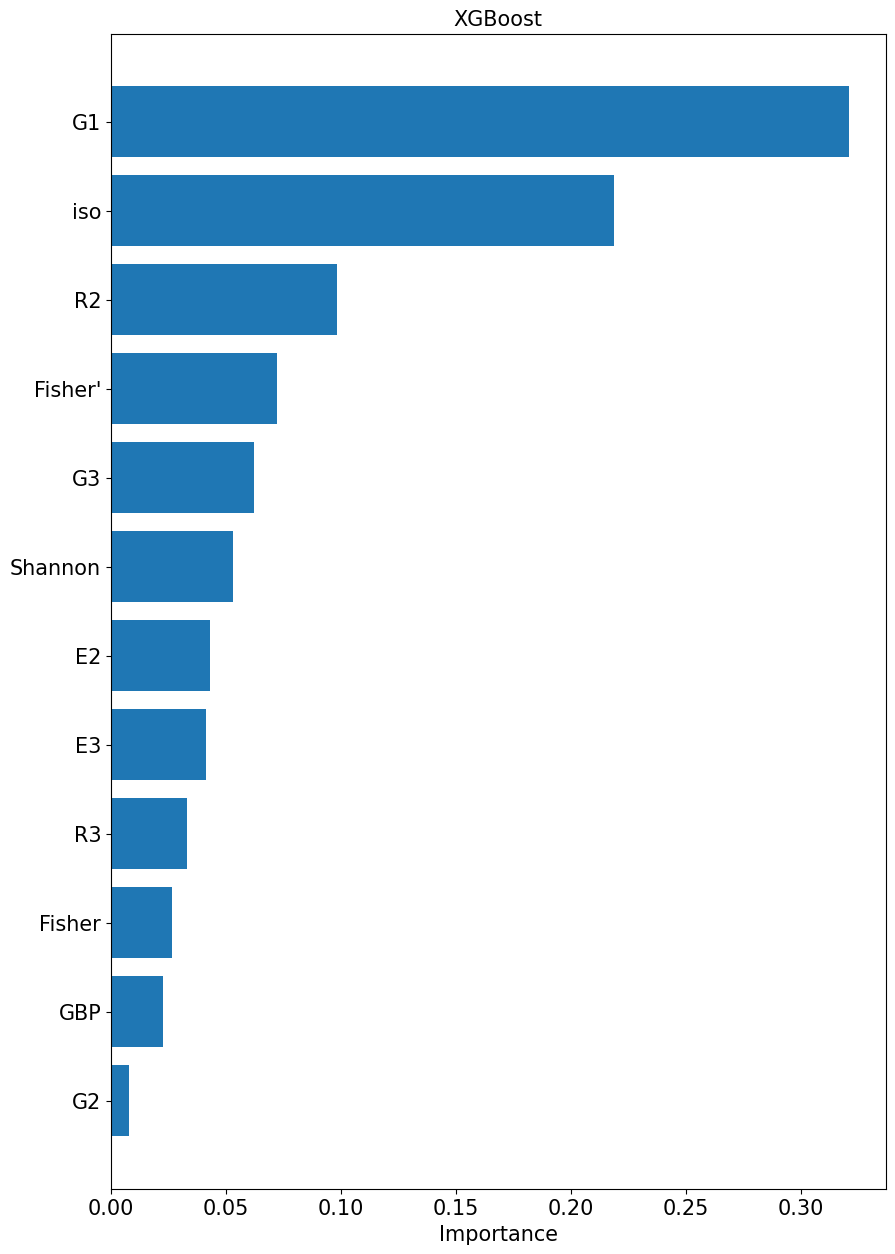

In [5]:
model.save_picture()